In [18]:
import pandas as pd

# Carico il dataset
df = pd.read_csv('compact.csv')

# Verifico le dimensioni del dataset (numero di righe e colonne)
print(f"Dimensioni del dataset: {df.shape}")

Dimensioni del dataset: (438246, 61)


In [20]:
# Mostro i primi 5 record
print(df.head())

       country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-01-01          NaN        NaN                 NaN   
1  Afghanistan  2020-01-02          NaN        NaN                 NaN   
2  Afghanistan  2020-01-03          NaN        NaN                 NaN   
3  Afghanistan  2020-01-04          NaN        NaN                 NaN   
4  Afghanistan  2020-01-05          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      NaN                    NaN   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578846.0   
1                             NaN           NaN         NaN  ...  40578846.0

In [22]:
# Verifico i metadati
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438246 entries, 0 to 438245
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     438246 non-null  object 
 1   date                                        438246 non-null  object 
 2   total_cases                                 425500 non-null  float64
 3   new_cases                                   423742 non-null  float64
 4   new_cases_smoothed                          422516 non-null  float64
 5   total_cases_per_million                     425500 non-null  float64
 6   new_cases_per_million                       423742 non-null  float64
 7   new_cases_smoothed_per_million              422516 non-null  float64
 8   total_deaths                                425500 non-null  float64
 9   new_deaths                                  424219 non-null  float64
 

In [26]:
# Filtro le righe con continenti definiti
df_continents = df.dropna(subset=['continent'])

In [28]:
# Calcolo il numero di casi totali per continente
cases_per_continent = df_continents.groupby('continent')['total_cases'].sum()

print(cases_per_continent)

continent
Africa           1.498494e+10
Asia             2.606095e+11
Europe           2.438417e+11
North America    1.305595e+11
Oceania          1.201822e+10
South America    7.541129e+10
Name: total_cases, dtype: float64


In [54]:
# Funzione per confrontare due continenti
def compare_continents(cont1, cont2):
    # Calcolare i casi totali globali (incluso quelli senza continente)
    total_world_cases = df['total_cases'].sum()

    # Filtrare i dati per i due continenti
    data1 = df_continents[df_continents['continent'] == cont1]['total_cases']
    data2 = df_continents[df_continents['continent'] == cont2]['total_cases']

    # Calcolo dei descrittori: massimo, media, percentuale rispetto al totale mondiale
    desc1 = {
        'max': round(data1.max(), 2),
        'mean': round(data1.mean(), 2),
        'percent_world': round((data1.sum() / total_world_cases) * 100, 2)
    }

    desc2 = {
        'max': round(data2.max(), 2),
        'mean': round(data2.mean(), 2),
        'percent_world': round((data2.sum() / total_world_cases) * 100, 2)
    }

    return desc1, desc2

# Definisco i nomi dei due continenti da confrontare
continent1 = 'Europe'
continent2 = 'Asia'

# Confronto tra i due continenti
continent_stats = compare_continents(continent1, continent2)
print(f"Statistiche di {continent1}: {continent_stats[0]}")
print(f"Statistiche di {continent2}: {continent_stats[1]}")

Statistiche di Europe: {'max': 38997490.0, 'mean': 2809171.44, 'percent_world': 4.63}
Statistiche di Asia: {'max': 99379039.0, 'mean': 3257862.59, 'percent_world': 4.95}


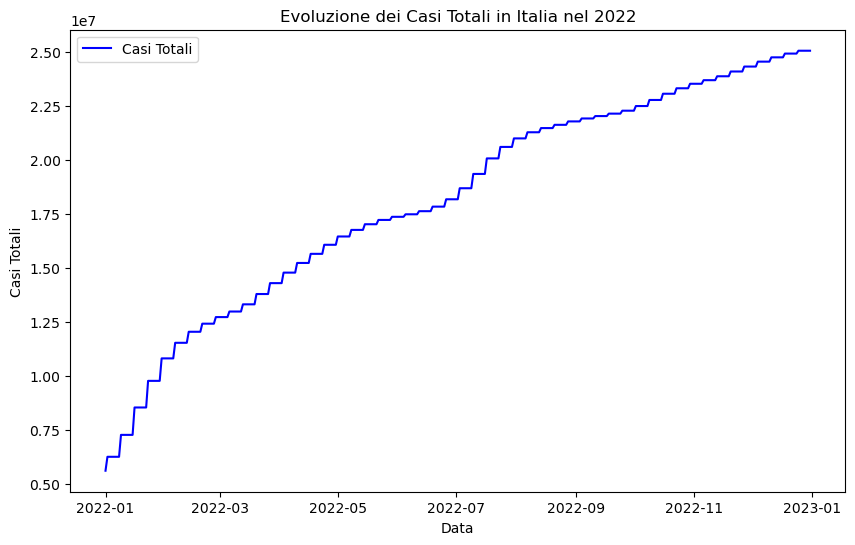

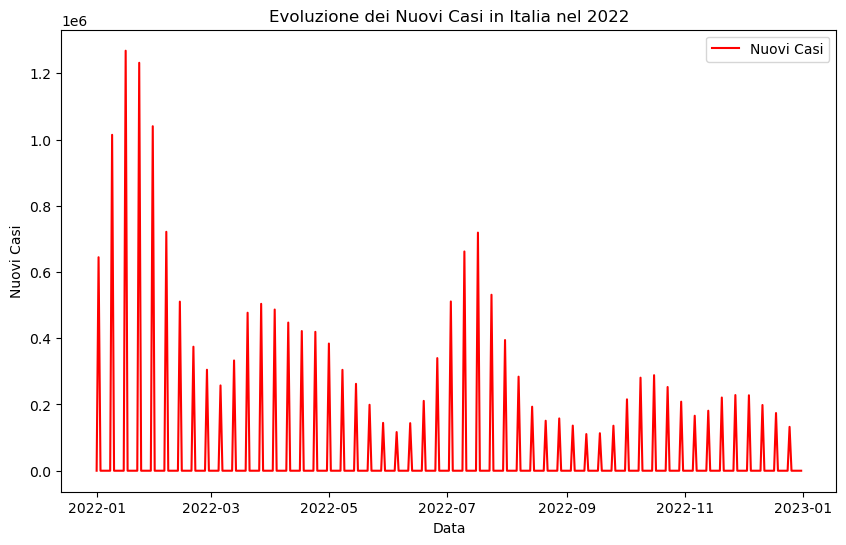

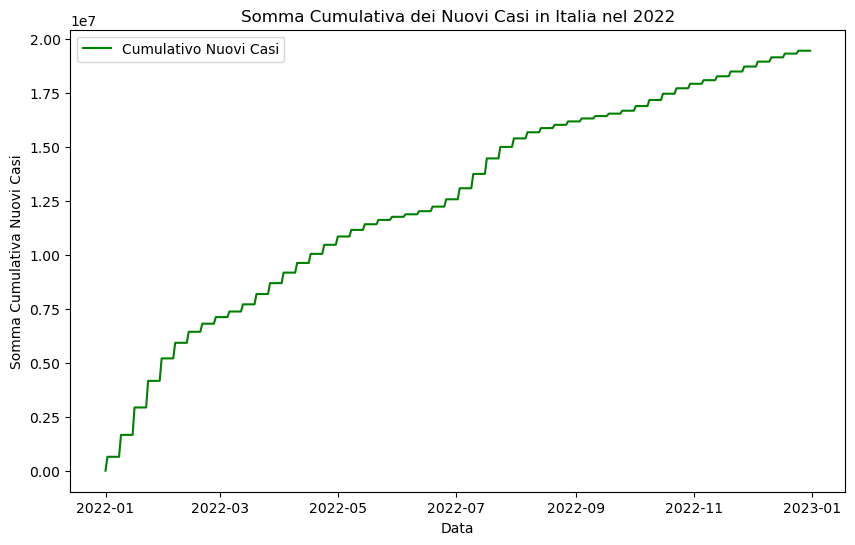

In [74]:
import matplotlib.pyplot as plt

# Filtro i dati dell'Italia per il 2022
df_italy_2022 = df[(df['country'] == 'Italy') & (df['date'].str.contains('2022'))] .copy()

# Converto la colonna 'date' in formato datetime
df_italy_2022['date'] = pd.to_datetime(df_italy_2022['date'])

# Grafico dell'evoluzione dei casi totali
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'], label='Casi Totali', color='blue')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.legend()
plt.show()

# Grafico del numero di nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['new_cases'], label='Nuovi Casi', color='red')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Evoluzione dei Nuovi Casi in Italia nel 2022')
plt.legend()
plt.show()

# Somma cumulativa dei nuovi casi
df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()

# Grafico della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(df_italy_2022['date'], df_italy_2022['cumulative_new_cases'], label='Cumulativo Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.title('Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

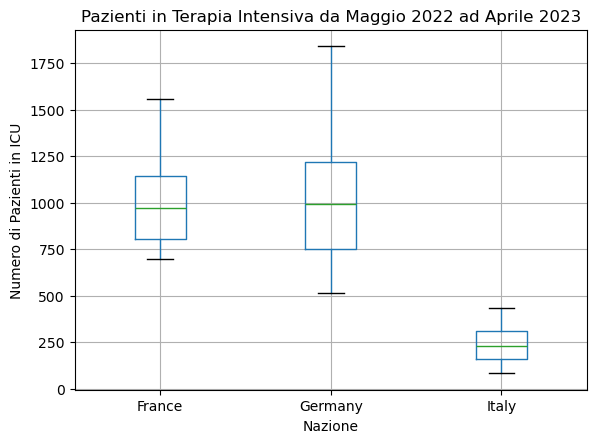

In [64]:
# Filtro i dati di Italia, Germania e Francia da mag 2022 ad apr 2023
df_icu = df[(df['country'].isin(['Italy', 'Germany', 'France'])) &
            (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

# Creare il boxplot per il numero di pazienti in terapia intensiva (ICU)
plt.figure(figsize=(10, 6))
df_icu.boxplot(column='icu_patients', by='country')
plt.title('Pazienti in Terapia Intensiva da Maggio 2022 ad Aprile 2023')
plt.suptitle('')  # Rimuove il titolo automatico del boxplot
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in ICU')
plt.show()

In [90]:
# Filtro dei dati per le nazioni richieste nell'anno 2023
nazioni_interesse = ['Italy', 'Germany', 'France', 'Spain']
df_ospedali = df[(df['country'].isin(nazioni_interesse)) &
                 (df['date'].str.contains('2023'))].copy()

# Controllo dei dati mancanti
valori_mancanti = df_ospedali['hosp_patients'].isna().sum().copy()
print(f"Sono presenti {valori_mancanti} valori mancanti nella colonna 'hosp_patients'.")

# Gestione dei dati nulli usando 0 in quanto è un valore neutro e non distorce i dati
df_ospedali['hosp_patients'] = df_ospedali['hosp_patients'].fillna(0)

# Calcolo della somma dei pazienti ospedalizzati per ciascuna nazione
pazienti_per_nazione = df_ospedali.groupby('country')['hosp_patients'].sum()

if pazienti_per_nazione is not None:
    pazienti_per_nazione = pazienti_per_nazione.copy()

Sono presenti 843 valori mancanti nella colonna 'hosp_patients'.
